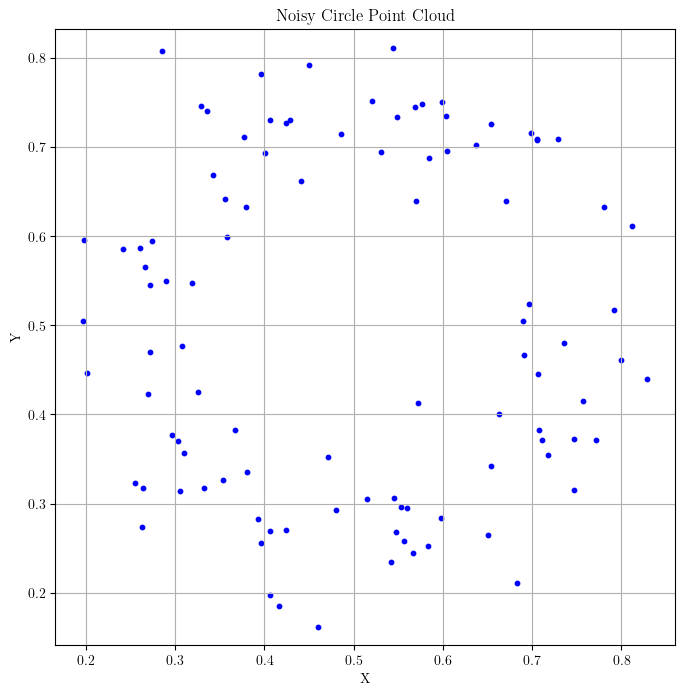

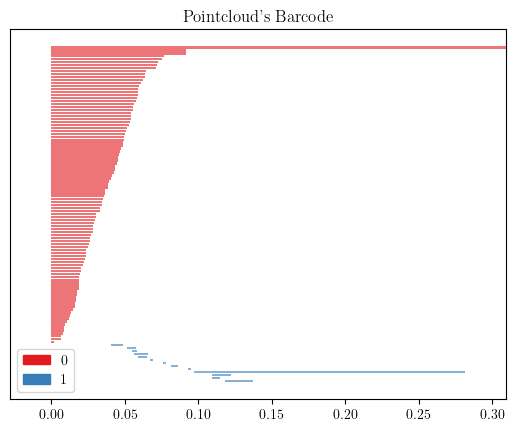

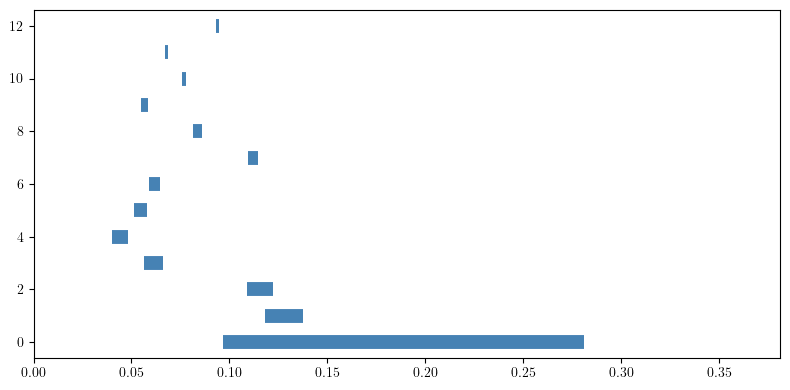

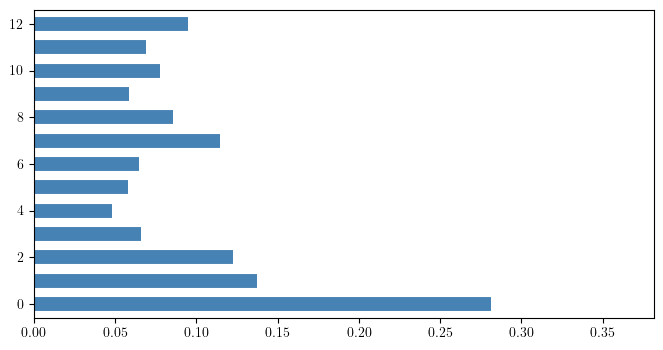

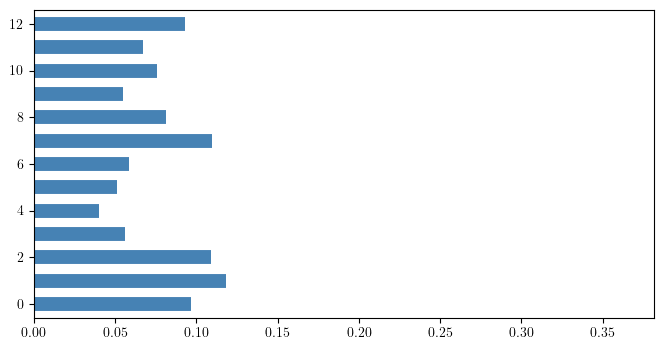

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd

import numpy as np
import matplotlib.pyplot as plt

# Parameters
radius = 0.25
center = np.array([0.5, 0.5])
num_points = 100  # Total number of points
noise_level = 0.05  # Amount of noise to add

# Generate points on a perfect circle
angles = np.linspace(0, 2*np.pi, num_points, endpoint=False)
x = center[0] + radius * np.cos(angles)
y = center[1] + radius * np.sin(angles)
perfect_circle = np.column_stack((x, y))

# Add Gaussian noise to make it a noisy circle
noisy_circle = perfect_circle + np.random.normal(scale=noise_level, size=(num_points, 2))

# Plot the points
plt.figure(figsize=(8, 8))
plt.scatter(noisy_circle[:, 0], noisy_circle[:, 1], s=10, c='blue')
plt.title('Noisy Circle Point Cloud')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.axis('equal')  # Keep aspect ratio equal
plt.show()

# Crear complejo de Rips
rips_complex = gd.RipsComplex(points=noisy_circle, max_edge_length=2.0)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Calcular persistencia
simplex_tree.compute_persistence()

# Graficar el barcode de persistencia
gd.plot_persistence_barcode(simplex_tree.persistence())
plt.title("Pointcloud's Barcode")
plt.show()
# Extraer los pares de nacimiento y muerte de la persistencia
persistence = simplex_tree.persistence()

finite_deaths = [death for (dim, (birth, death)) in persistence if np.isfinite(death)]
max_filtration = max(finite_deaths) + 0.1 if finite_deaths else 0.5


# Extraer características de dimensión 1 (ciclos)
dim_1_pairs = [pair[1] for pair in persistence if pair[0] == 1]
bd_array = np.array(dim_1_pairs)

# Graficar solo la barcode de dimensión 1 (horizontal)
plt.figure(figsize=(8, 4))
for i, (birth, death) in enumerate(bd_array):
    plt.hlines(y=i, xmin=birth, xmax=death, color='steelblue', linewidth=10)
plt.xlim(0, max_filtration)
plt.tight_layout()
plt.show()

# Graficar solo la barcode de dimensión 1 (horizontal)
plt.figure(figsize=(8, 4))
for i, (birth, death) in enumerate(bd_array):
    # Start the bars at 0 instead of 'birth'
    plt.xlim(0, max_filtration)
    plt.hlines(y=i, xmin=0, xmax=death, color='steelblue', linewidth=10)
plt.figure(figsize=(8, 4))
for i, (birth, death) in enumerate(bd_array):
    # Start the bars at 0 instead of 'birth'
    plt.xlim(0, max_filtration)
    plt.hlines(y=i, xmin=0, xmax=birth, color='steelblue', linewidth=10)
